In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing The Dataset

In [2]:
data=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data=data.replace({'Male':1,'Female':0})

# Segregate The Dataset

In [5]:
X=data.iloc[:,1:-1]
Y=data.iloc[:,-1]

In [6]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


# Feature Scalling

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [9]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Training The Model

In [10]:
 from sklearn.linear_model import LogisticRegression

In [11]:
Log=LogisticRegression()

In [12]:
Log.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred=Log.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.9125


In [16]:
print("Classification Summary: \n",classification_report(y_test,y_pred))

Classification Summary: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [17]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[56  2]
 [ 5 17]]


# Evaluation The Model

# Receiver Operating Curve(ROC Curve)

In [18]:
from sklearn.metrics import roc_auc_score,roc_curve

In [19]:
nsProbability=[0 for i in range(len(y_test))]

In [20]:

lsProbability=Log.predict_proba(X_test)

In [21]:
lsProbability[0:5]

array([[0.86651429, 0.13348571],
       [0.83534896, 0.16465104],
       [0.78033663, 0.21966337],
       [0.9072113 , 0.0927887 ],
       [0.90135891, 0.09864109]])

### Keep Probabilities for Positive outcomes only

In [22]:
lsProbability=lsProbability[:,1]

In [23]:
lsProbability[0:5]

array([0.13348571, 0.16465104, 0.21966337, 0.0927887 , 0.09864109])

In [24]:
#calculate Scores
nsAUC=roc_auc_score(y_test,nsProbability)
lrAUC=roc_auc_score(y_test,lsProbability)


In [25]:
#Summurise the Scores
print('No Skill: ROC AUC : %f'%(nsAUC*100))
print("Logistic Skill:ROC AUC: %f"%(lrAUC*100))


No Skill: ROC AUC : 50.000000
Logistic Skill:ROC AUC: 97.884013


# Plot ROC curve for the model

In [26]:
nsFP,nsTP,_=roc_curve(y_test,nsProbability)

lrFP,lrTP,_=roc_curve(y_test,lsProbability)


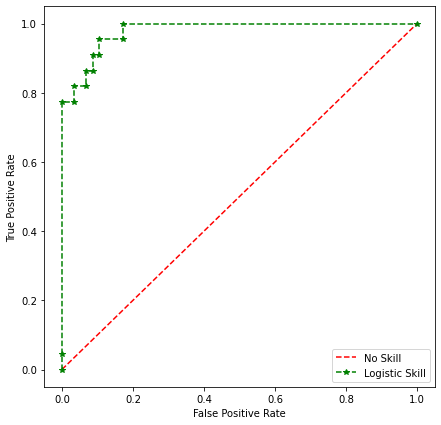

In [27]:
plt.figure(figsize=(7,7))
plt.plot(nsFP,nsTP,'--r',label='No Skill')
plt.plot(lrFP,lrTP,'--g*',label='Logistic Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Cross Validation Score

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10)
result=cross_val_score(Log,X,Y,cv=kfold)
print('CROSS VALIDATION SCORE:%f'%(result.mean()*100))

CROSS VALIDATION SCORE:66.750000


# Stratified  K_Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=11)
result=cross_val_score(Log,X,Y,cv=skfold)
print("CROSS VALIDATION SCORE:%f"%(result.mean()*100))


CROSS VALIDATION SCORE:66.455091


In [37]:
for i in range(2,20):
    skfold=StratifiedKFold(n_splits=i)
    result=cross_val_score(Log,X,Y,cv=skfold)
    print("CROSS VALIDATION SCORE:%f"%(result.mean()*100))


CROSS VALIDATION SCORE:64.250000
CROSS VALIDATION SCORE:64.500804
CROSS VALIDATION SCORE:64.250000
CROSS VALIDATION SCORE:67.500000
CROSS VALIDATION SCORE:64.250716
CROSS VALIDATION SCORE:64.251145
CROSS VALIDATION SCORE:64.250000
CROSS VALIDATION SCORE:64.248036
CROSS VALIDATION SCORE:64.250000
CROSS VALIDATION SCORE:66.455091
CROSS VALIDATION SCORE:65.225787
CROSS VALIDATION SCORE:64.243176
CROSS VALIDATION SCORE:64.250528
CROSS VALIDATION SCORE:64.264008
CROSS VALIDATION SCORE:66.000000
CROSS VALIDATION SCORE:65.984655
CROSS VALIDATION SCORE:64.240228
CROSS VALIDATION SCORE:64.251538


# Commulative Accuracy Profile (CAP Curve)

80
22


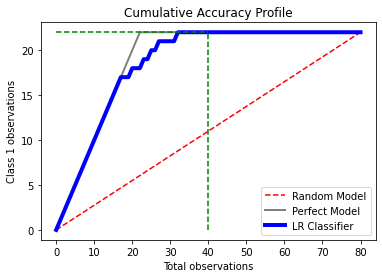

In [38]:

total = len(y_test)
print(total)
class_1_count = np.sum(y_test)
print(class_1_count)
class_0_count = total - class_1_count
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

probs = Log.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'LR Classifier', 
         linewidth = 4)

index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')